In [10]:
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017")
db = client.test

import jieba
jieba.set_dictionary('dict.txt.big')

In [11]:
# Jieba 斷詞工具
seg_list = jieba.cut("晚一點我們去吃大餐好嗎？")
print(", ".join(seg_list))

Building prefix dict from /Users/Kent/src/Chinese_lyrics_analysis/dict.txt.big ...
DEBUG:jieba:Building prefix dict from /Users/Kent/src/Chinese_lyrics_analysis/dict.txt.big ...
Loading model from cache /var/folders/qh/ym0qcw3d6w3_1hnkqf7xzxt40000gn/T/jieba.uaba23d6c739911e208dcbd05db062e96.cache
DEBUG:jieba:Loading model from cache /var/folders/qh/ym0qcw3d6w3_1hnkqf7xzxt40000gn/T/jieba.uaba23d6c739911e208dcbd05db062e96.cache
Loading model cost 2.306 seconds.
DEBUG:jieba:Loading model cost 2.306 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


晚一點, 我們, 去, 吃, 大餐, 好, 嗎, ？


In [4]:
%matplotlib inline

from wordcloud import WordCloud
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [85]:
def filter_rule_1(input):
    return True if len(input.strip()) > 2 else False

def filter_rule_2(input):
    return False if input.isdigit() else True

def draw_word_cloud(artist):
    cursor = db.lyrics.find({'artist': artist})

    if cursor.count() is 0:
        return

    whole_lyrics = "".join([document['lyrics'] for document in cursor])
    token_list = [token for token in jieba.cut(whole_lyrics)]

    token_list = filter(filter_rule_1, token_list)
    token_list = filter(filter_rule_2, token_list)

    from collections import Counter
    counter = Counter(token_list)

    for t in counter.most_common(20):
        print("%s: %s" % (t[0], t[1]))
    
    wordcloud = WordCloud(
        font_path="/Library/Fonts/儷黑 Pro.ttf", background_color="black"
    ).fit_words(counter.most_common(100))

    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

you: 235
the: 103
love: 95
Melao: 90
Amour: 86
And: 79
and: 75
...: 64
all: 55
You: 55
she: 54
花花公子: 54
Again: 52
Smile: 52
一千個: 52
HONEY: 50
that: 46
want: 45
Cry: 45
can: 42


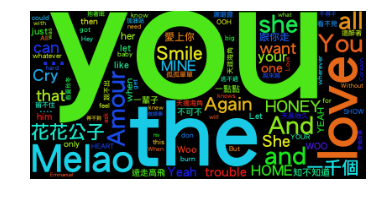

In [86]:
draw_word_cloud('張學友')

雙截棍: 50
周杰倫: 37
幹什麼: 36
What: 31
Hey: 29
know: 29
you: 29
看不見: 27
來不及: 21
沒關係: 18
西元前: 17
半獸人: 17
怎麼辦: 17
從來不: 16
是不是: 16
請原諒: 14
Jay: 14
the: 14
石板路: 13
背對背: 13


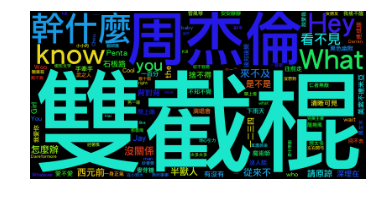

In [87]:
draw_word_cloud('周杰倫')

you: 104
...: 94
the: 75
You: 64
Love: 46
YEAH: 39
一點點: 38
默默地: 37
Lonely: 36
不知不覺: 35
Yes: 29
can: 28
忘不了: 28
轉眼間: 26
Woo: 25
有沒有: 25
love: 25
that: 24
風風雨雨: 24
your: 23


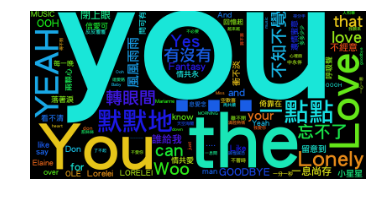

In [88]:
draw_word_cloud('譚詠麟')